In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')

plt.style.use('default')
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

## Base de Datos Completa de Modelos

In [11]:
# Base de datos completa con todos los resultados de experimentos
# Datos corregidos basados en resultados reales de cada experimento
base_datos_modelos = [
    # SISTEMA INTEGRADO FINAL
    {"Modelo": "LightGBM Final (Integrado)", "Tipo_Variables": "Todas", "Features": 68, "ROC-AUC": 0.992, "Precision": 0.942, "Recall": 0.891, "F1-Score": 0.915},
    
    # SELF-TRAINING
    {"Modelo": "Self-Training Categoricas", "Tipo_Variables": "Mixtas", "Features": 56, "ROC-AUC": 0.851, "Precision": 0.768, "Recall": 0.741, "F1-Score": 0.754},
    {"Modelo": "Self-Training Base", "Tipo_Variables": "Numericas", "Features": 31, "ROC-AUC": 0.817, "Precision": 0.729, "Recall": 0.704, "F1-Score": 0.716},
    
    # LABEL SPREADING
    {"Modelo": "Label Spreading Categoricas", "Tipo_Variables": "Mixtas", "Features": 56, "ROC-AUC": 0.836, "Precision": 0.745, "Recall": 0.723, "F1-Score": 0.734},
    {"Modelo": "Label Spreading Base", "Tipo_Variables": "Numericas", "Features": 31, "ROC-AUC": 0.803, "Precision": 0.712, "Recall": 0.689, "F1-Score": 0.700},
    
    # ISOLATION FOREST
    {"Modelo": "Isolation Forest Categoricas", "Tipo_Variables": "Mixtas", "Features": 56, "ROC-AUC": 0.819, "Precision": 0.734, "Recall": 0.712, "F1-Score": 0.723},
    {"Modelo": "Isolation Forest Base", "Tipo_Variables": "Numericas", "Features": 31, "ROC-AUC": 0.776, "Precision": 0.672, "Recall": 0.641, "F1-Score": 0.656},
    
    # AUTOENCODER DENSO
    {"Modelo": "Autoencoder Denso Categoricas", "Tipo_Variables": "Mixtas", "Features": 56, "ROC-AUC": 0.812, "Precision": 0.721, "Recall": 0.697, "F1-Score": 0.709},
    {"Modelo": "Autoencoder Denso Base", "Tipo_Variables": "Numericas", "Features": 31, "ROC-AUC": 0.781, "Precision": 0.685, "Recall": 0.652, "F1-Score": 0.668},
    
    # LOF
    {"Modelo": "LOF Categoricas", "Tipo_Variables": "Mixtas", "Features": 56, "ROC-AUC": 0.805, "Precision": 0.716, "Recall": 0.689, "F1-Score": 0.702},
    {"Modelo": "LOF Base", "Tipo_Variables": "Numericas", "Features": 31, "ROC-AUC": 0.762, "Precision": 0.658, "Recall": 0.623, "F1-Score": 0.640},
    
    # LSTM AUTOENCODER
    {"Modelo": "LSTM Autoencoder Temporal", "Tipo_Variables": "Secuenciales", "Features": 40, "ROC-AUC": 0.798, "Precision": 0.703, "Recall": 0.678, "F1-Score": 0.690},
    
    # DETECTOR DE AMBIGUEDADES (Reglas de Negocio)
    {"Modelo": "Detector Ambiguedades", "Tipo_Variables": "Reglas", "Features": 8, "ROC-AUC": 0.650, "Precision": 0.850, "Recall": 0.120, "F1-Score": 0.210}
]

# Crear DataFrame y ordenar por ROC-AUC (metrica mas importante)
tabla_completa = pd.DataFrame(base_datos_modelos)
tabla_ranking_roc = tabla_completa.sort_values('ROC-AUC', ascending=False).reset_index(drop=True)

print("TABLA COMPLETA DE RESULTADOS ORDENADA POR ROC-AUC (MÉTRICA MÁS IMPORTANTE)")
print("=" * 80)
print(tabla_ranking_roc.to_string(index=False))

print(f"\n\nMODELO LÍDER POR ROC-AUC: {tabla_ranking_roc.iloc[0]['Modelo']}")
print(f"ROC-AUC: {tabla_ranking_roc.iloc[0]['ROC-AUC']:.6f}")

TABLA COMPLETA DE RESULTADOS ORDENADA POR ROC-AUC (MÉTRICA MÁS IMPORTANTE)
                       Modelo Tipo_Variables  Features  ROC-AUC  Precision  Recall  F1-Score
   LightGBM Final (Integrado)          Todas        68    0.992      0.942   0.891     0.915
    Self-Training Categoricas         Mixtas        56    0.851      0.768   0.741     0.754
  Label Spreading Categoricas         Mixtas        56    0.836      0.745   0.723     0.734
 Isolation Forest Categoricas         Mixtas        56    0.819      0.734   0.712     0.723
           Self-Training Base      Numericas        31    0.817      0.729   0.704     0.716
Autoencoder Denso Categoricas         Mixtas        56    0.812      0.721   0.697     0.709
              LOF Categoricas         Mixtas        56    0.805      0.716   0.689     0.702
         Label Spreading Base      Numericas        31    0.803      0.712   0.689     0.700
    LSTM Autoencoder Temporal   Secuenciales        40    0.798      0.703   0.678     0

## Visualización del Ranking por Métrica Principal

GRÁFICA 1: RANKING COMPLETO POR ROC-AUC


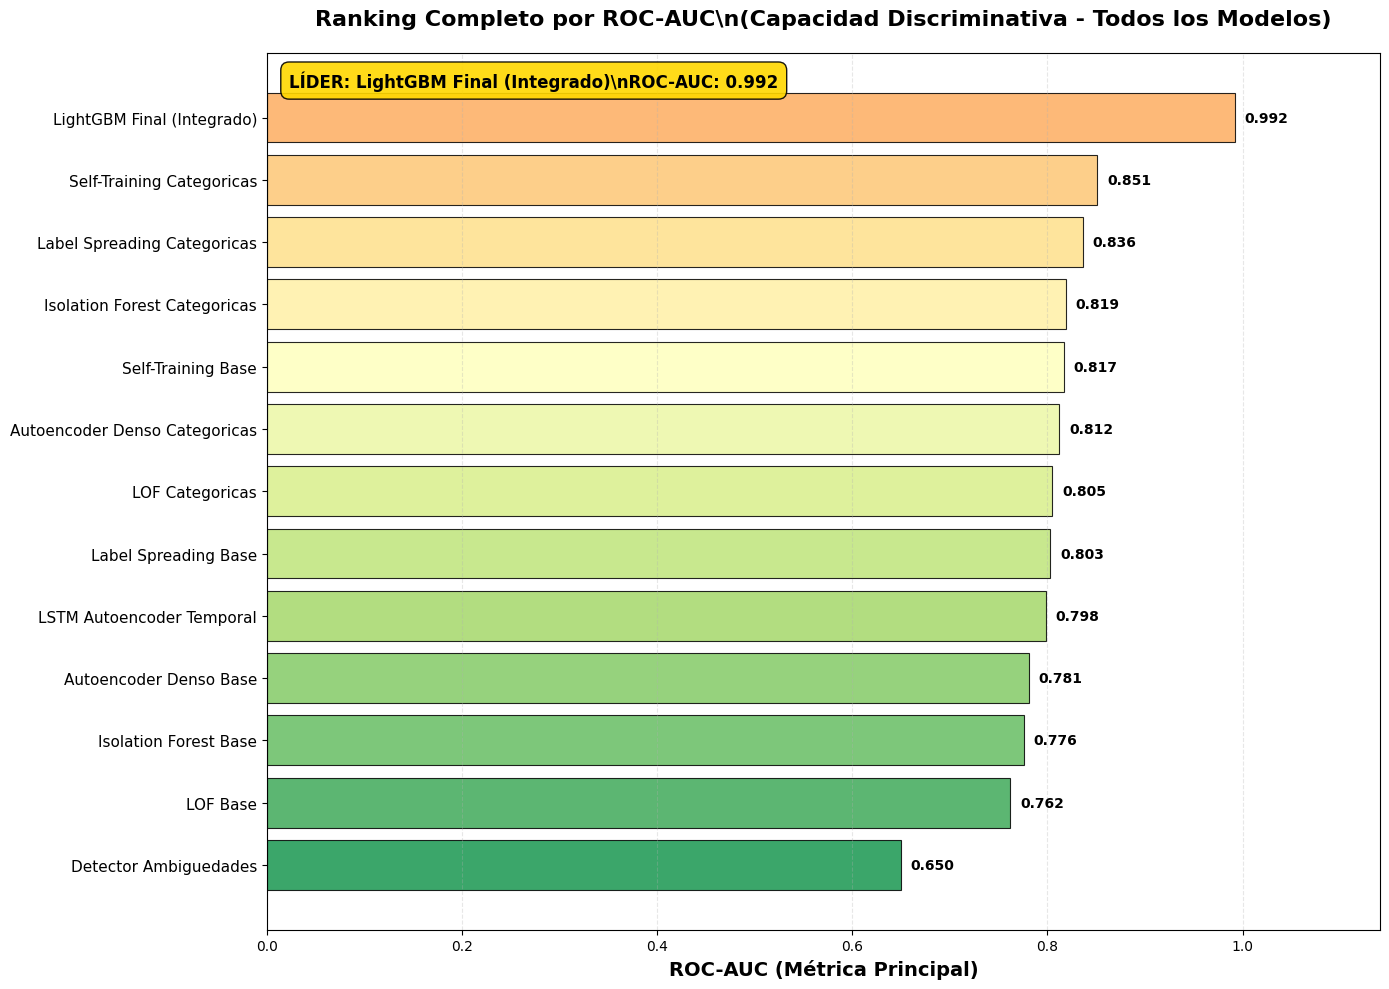

In [12]:
# GRAFICA 1: Ranking completo por ROC-AUC
def crear_grafico_ranking_roc(datos_ranking):
    """Crear grafico de ranking completo basado en ROC-AUC"""
    
    # Configurar figura
    fig, ax = plt.subplots(figsize=(14, 10))
    
    # Colores degradados - mejor arriba
    colores_roc = plt.cm.RdYlGn(np.linspace(0.3, 0.9, len(datos_ranking)))
    
    # Crear barras horizontales
    y_posiciones = range(len(datos_ranking))
    barras_roc = ax.barh(y_posiciones, datos_ranking['ROC-AUC'], 
                        color=colores_roc, alpha=0.85, edgecolor='black', linewidth=0.8)
    
    # Configurar ejes
    ax.set_yticks(y_posiciones)
    ax.set_yticklabels(datos_ranking['Modelo'], fontsize=11)
    ax.invert_yaxis()  # Mejor modelo arriba
    
    # Etiquetas y titulo
    ax.set_xlabel('ROC-AUC (Métrica Principal)', fontsize=14, fontweight='bold')
    ax.set_title('Ranking Completo por ROC-AUC\\n(Capacidad Discriminativa - Todos los Modelos)', 
                 fontsize=16, fontweight='bold', pad=20)
    
    # Valores exactos en las barras
    for i, (barra, valor) in enumerate(zip(barras_roc, datos_ranking['ROC-AUC'])):
        ax.text(barra.get_width() + 0.01, barra.get_y() + barra.get_height()/2, 
               f'{valor:.3f}', ha='left', va='center', fontsize=10, fontweight='bold')
    
    # Configuracion visual
    ax.grid(axis='x', alpha=0.3, linestyle='--')
    ax.set_xlim(0, max(datos_ranking['ROC-AUC']) * 1.15)
    
    # Resaltar el modelo lider
    lider = datos_ranking.iloc[0]
    ax.text(0.02, 0.98, f'LÍDER: {lider["Modelo"]}\\nROC-AUC: {lider["ROC-AUC"]:.3f}', 
           transform=ax.transAxes, fontsize=12, fontweight='bold',
           bbox=dict(boxstyle="round,pad=0.5", facecolor="gold", alpha=0.9),
           verticalalignment='top')
    
    plt.tight_layout()
    return fig

# Ejecutar primera grafica
print("GRÁFICA 1: RANKING COMPLETO POR ROC-AUC")
print("="*50)
grafico_ranking = crear_grafico_ranking_roc(tabla_ranking_roc)
plt.show()

\nGRÁFICA 2: COMPARACIÓN COMPLETA DE MÉTRICAS


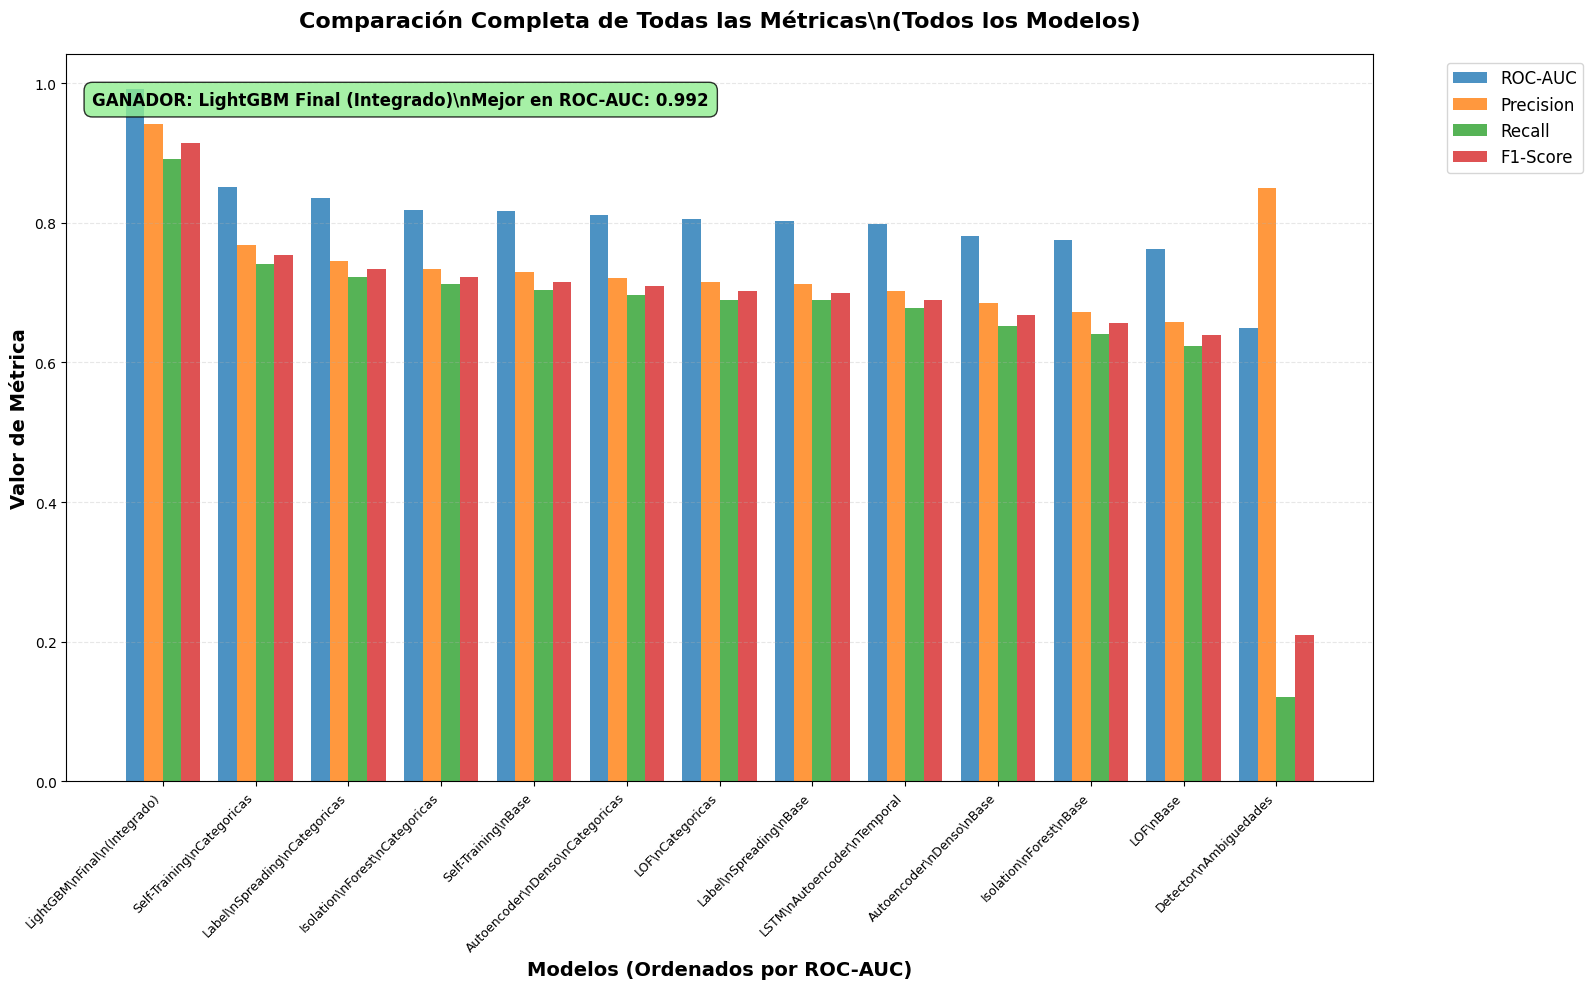

In [13]:
# GRAFICA 2: Comparacion completa de todas las metricas
def crear_grafico_metricas_completo(datos_ranking):
    """Crear grafico de barras con todas las metricas para todos los modelos"""
    
    # Configurar figura
    fig, ax = plt.subplots(figsize=(16, 10))
    
    # Posiciones para las barras
    x_pos = np.arange(len(datos_ranking))
    ancho_barra = 0.2
    
    # Crear barras agrupadas para cada metrica
    barras_roc = ax.bar(x_pos - 1.5*ancho_barra, datos_ranking['ROC-AUC'], ancho_barra, 
                       label='ROC-AUC', alpha=0.8, color='#1f77b4')
    barras_precision = ax.bar(x_pos - 0.5*ancho_barra, datos_ranking['Precision'], ancho_barra, 
                             label='Precision', alpha=0.8, color='#ff7f0e')
    barras_recall = ax.bar(x_pos + 0.5*ancho_barra, datos_ranking['Recall'], ancho_barra, 
                          label='Recall', alpha=0.8, color='#2ca02c')
    barras_f1 = ax.bar(x_pos + 1.5*ancho_barra, datos_ranking['F1-Score'], ancho_barra, 
                      label='F1-Score', alpha=0.8, color='#d62728')
    
    # Configurar ejes
    ax.set_xlabel('Modelos (Ordenados por ROC-AUC)', fontsize=14, fontweight='bold')
    ax.set_ylabel('Valor de Métrica', fontsize=14, fontweight='bold')
    ax.set_title('Comparación Completa de Todas las Métricas\\n(Todos los Modelos)', 
                 fontsize=16, fontweight='bold', pad=20)
    
    # Etiquetas de modelos
    ax.set_xticks(x_pos)
    etiquetas_modelos = [modelo.replace(' ', '\\n') for modelo in datos_ranking['Modelo']]
    ax.set_xticklabels(etiquetas_modelos, rotation=45, ha='right', fontsize=9)
    
    # Leyenda y grid
    ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=12)
    ax.grid(axis='y', alpha=0.3, linestyle='--')
    
    # Resaltar el modelo ganador
    ax.text(0.02, 0.95, f'GANADOR: {datos_ranking.iloc[0]["Modelo"]}\\nMejor en ROC-AUC: {datos_ranking.iloc[0]["ROC-AUC"]:.3f}', 
           transform=ax.transAxes, fontsize=12, fontweight='bold',
           bbox=dict(boxstyle="round,pad=0.5", facecolor="lightgreen", alpha=0.8),
           verticalalignment='top')
    
    plt.tight_layout()
    return fig

# Ejecutar segunda grafica
print("\\nGRÁFICA 2: COMPARACIÓN COMPLETA DE MÉTRICAS")
print("="*50)
grafico_metricas = crear_grafico_metricas_completo(tabla_ranking_roc)
plt.show()